In [1]:
import pandas as pd
import os
import io

In [15]:
data_path = "/Users/anasouza/ppgeb_masters/data/teste_ana.txt"

In [16]:
data_list = []
with io.open(data_path, mode="r", encoding="utf-8") as f:
    for line in f:
        data_list.append(line.rstrip().split())

In [18]:
df_2 = pd.DataFrame(data_list)

df_2.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
dtype: object

In [10]:
from asyncio.subprocess import _ExecArg


def replace_blink_values(val):
    if val != "0":
        x = "200"
    else:
        x = "0"
    return x

def blink_et(val):
    if val != 0:
        return "BLINK 500"
    if val == 0:
        return val

def identificar_blink_eeg(val):
    try: 
        x = int(val)
        if x > 150:
            return 500
        else:
            return val
    except:
        return val


def clean_dataset(data_list):
    df = pd.DataFrame(data_list)
    df.columns=df.iloc[0] 
    df = df.iloc[1:]
    df.iloc[-1,-1] = df.iloc[-1,3]
    df.USER = df.USER.replace("START_RECORDING", "START_RECORDING 100").replace("STOP_EYETRACKER", "STOP_EYETRACKER 200")
    df = df.loc[df["USER"] != "CLIENT2_READY"]

    eeg = df.iloc[:,[2,-1]]
    et = df.iloc[:,:-1]

    et["BKID"] = et.BKID.apply(replace_blink_values)
    eeg['USER'] = eeg.USER.apply(identificar_blink_eeg)
    et["USER"] = et.BKID.apply(blink_et)

    et["BKID"] = et["BKID"].astype("object")
    et["USER"] = et["USER"].astype("object")
    eeg["USER"] = eeg["USER"].astype("object")

    return eeg, et

In [8]:
eeg_n, et_n = clean_dataset(data_list)

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_50642/2471677495.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  et["BKID"] = et.BKID.apply(replace_blink_values)
/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_50642/2471677495.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg['USER'] = eeg.USER.apply(identificar_blink_eeg)


In [14]:
eeg_n.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/eeg_v2.txt",sep=' ', index=False, header=False)
et_n.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/et_v2.txt",sep=' ', index=False, header=False)

In [134]:
df.to_csv("/Users/anasouza/ppgeb_masters/data/df_teste.txt",sep=' ', index=False, header=False)

In [33]:
df

,DATATYPE,CNT,TIME,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,BKID,BKDUR,BKPMIN,USER
1,SMP,3044,55.52422,0.56619,0.48659,11.54351,1.14683,1,0.85490,0.57672,...,1,0.02710,-0.00230,0.61262,0.00397,1,0,0.00000,17,START_RECORDING 100
2,SMP,3045,55.54046,0.56615,0.48638,11.44779,1.14683,1,0.85483,0.57686,...,1,0.02710,-0.00230,0.61262,0.00400,1,0,0.00000,17,START_RECORDING 100
3,SMP,3046,55.55647,0.56615,0.48638,11.44779,1.14683,1,0.85483,0.57686,...,1,0.02710,-0.00230,0.61262,0.00400,1,0,0.00000,17,START_RECORDING 100
4,SMP,3047,55.57299,0.56598,0.48684,11.07421,1.14683,1,0.85483,0.57669,...,1,0.02710,-0.00230,0.61262,0.00394,1,0,0.00000,17,START_RECORDING 100
5,SMP,3048,55.58952,0.56619,0.48659,11.54351,1.14683,1,0.85503,0.57686,...,1,0.02710,-0.00230,0.61262,0.00394,1,0,0.00000,17,START_RECORDING 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,SMP,5042,90.30318,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25
2794,SMP,5043,90.31960,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25
2795,SMP,5044,90.34824,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25
2796,SMP,5045,90.35268,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25


In [11]:
eeg_data = df.iloc[:,[2,-1]]

In [12]:
eeg_data.to_csv("/Users/anasouza/ppgeb_masters/data/eeg_only_v1.txt", sep=' ', index=False, header=False)

In [57]:
import plotly.express as px
import numpy as np

def plot_time_series_eeg(df):
    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]
    df_plot.USER = df_plot.USER.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float)
    fig = px.line(df_plot, x='TIME', y="USER")
    fig.show()

In [58]:
plot_time_series_eeg(df)

In [62]:
# identificar piscadas no EEG

def replace_blink_values(val):
    if val != 0:
        x = 200
    else:
        x = 0
    return x


def plot_time_series_ET(df):
    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]
    df_plot.BKID = df_plot.BKID.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float)
    df_plot["BKID_t"] = df_plot.BKID.apply(replace_blink_values)
    fig = px.line(df_plot, x='TIME', y="BKID_t")
    fig.show()

In [63]:
plot_time_series_ET(df)

In [127]:
import matplotlib.pyplot as plt 


def plot_both(df):

    df_plot = df.loc[df["USER"] != "START_RECORDING 100"]
    df_plot = df_plot.loc[df["USER"] != "STOP_EYETRACKER 200"]
    df_plot = df_plot.loc[df["USER"].notnull()]

    df_plot.USER = df_plot.USER.astype(int)
    df_plot.TIME = df_plot.TIME.astype(float) 
    df_plot.BKID = df_plot.BKID.astype(int)

    df_plot["BKID_t"] = df_plot.BKID.apply(replace_blink_values)

    ax1 = df_plot.USER.plot(color='blue', grid=True, label='Count')
    ax2 = df_plot.BKID_t.plot(color='orange', grid=True, secondary_y=True, alpha=0.5)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.show()

    eeg = df_plot.iloc[:,[2,-2]]
    et = df_plot.iloc[:,:-2]

    eeg.iloc[0,1] = 100
    eeg.iloc[0,2] = 100
    eeg.iloc[0,3] = 100
    eeg.iloc[-1,-1] = 200

    return eeg, et

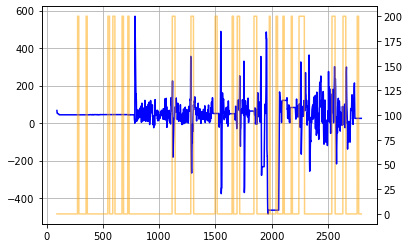

IndexError: iloc cannot enlarge its target object

In [128]:
eeg, et = plot_both(df)

In [ ]:
eeg

,TIME,USER
92,57.34677,100
94,57.36003,53
95,57.36270,53
97,57.36633,51
98,57.38027,51
...,...,...
2792,90.28777,25
2793,90.30318,25
2794,90.31960,25
2795,90.34824,25


# Annotate in Data

In [129]:
def identificar_blink_eeg(val):
    if val > 150:
        return 500
    else:
        return val

eeg['USER'] = eeg.USER.apply(identificar_blink_eeg)

<AxesSubplot:>

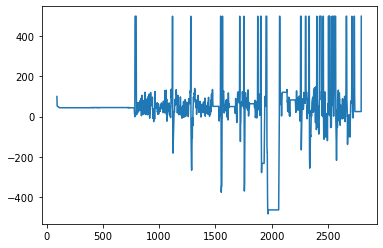

In [130]:
eeg.USER.plot()

In [101]:
def blink_et(val):
    if val != 0:
        return "BLINK 500"
    else:
        return val

In [102]:
et["USER"] = et.BKID.apply(blink_et)

In [103]:
et

,DATATYPE,CNT,TIME,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,BKID,BKDUR,BKPMIN,USER
92,SMP,3133,57.34677,0.57532,0.48531,10.67828,1.67191,1,0.86012,0.57543,...,1,0.02710,-0.00230,0.61262,0.00421,1,0,0.00000,17,0
94,SMP,3134,57.36003,0.57527,0.48495,10.61244,1.62731,1,0.86049,0.57553,...,1,0.02710,-0.00230,0.61262,0.00421,1,0,0.00000,17,0
95,SMP,3135,57.36270,0.57534,0.48475,10.52647,1.60556,1,0.86016,0.57477,...,1,0.02710,-0.00230,0.61262,0.00412,1,0,0.00000,17,0
97,SMP,3136,57.36633,0.57539,0.48465,10.76887,1.60556,1,0.86037,0.57520,...,1,0.02710,-0.00230,0.61262,0.00425,1,0,0.00000,17,0
98,SMP,3137,57.38027,0.57541,0.48476,10.69365,1.60556,1,0.86037,0.57520,...,1,0.02710,-0.00230,0.61262,0.00425,1,0,0.00000,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,SMP,5041,90.28777,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,0
2793,SMP,5042,90.30318,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,0
2794,SMP,5043,90.31960,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,0
2795,SMP,5044,90.34824,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,0


In [105]:
et.USER.value_counts()

0            1643
BLINK 500     270
Name: USER, dtype: int64

In [107]:
eeg.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/eeg.csv")
et.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/et.csv")

In [108]:
et.to_csv("/Users/anasouza/ppgeb_masters/data/annotated/et.txt",sep=' ', index=False, header=False)